In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

C:\Users\sumit\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('Admission_Prediction.csv')
data.head(10)
data.tail(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
490,491,307.0,105.0,2.0,2.5,4.5,8.12,1,0.67
491,492,297.0,99.0,4.0,3.0,3.5,7.81,0,0.54
492,493,298.0,101.0,4.0,2.5,4.5,7.69,1,0.53
493,494,300.0,95.0,2.0,3.0,1.5,8.22,1,0.62
494,495,301.0,99.0,3.0,2.5,2.0,8.45,1,0.68
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [4]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [5]:
print(data['GRE Score'].value_counts())
data['GRE Score'].mean()
#316.55876288659795

324.0    22
312.0    22
322.0    17
316.0    17
321.0    17
327.0    17
320.0    16
311.0    16
314.0    16
317.0    15
325.0    15
315.0    13
308.0    13
313.0    12
326.0    12
319.0    12
300.0    12
318.0    12
323.0    12
304.0    11
305.0    11
298.0    10
310.0    10
329.0    10
307.0    10
301.0    10
340.0     9
331.0     9
328.0     8
330.0     8
309.0     8
299.0     8
332.0     7
306.0     7
334.0     7
297.0     6
302.0     6
296.0     5
336.0     5
303.0     5
295.0     5
338.0     4
333.0     4
335.0     4
339.0     3
337.0     2
294.0     2
290.0     2
293.0     1
Name: GRE Score, dtype: int64


316.55876288659795

In [6]:
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [7]:
data['TOEFL Score'].fillna(data['TOEFL Score'].mode()[0])

0      118.0
1      107.0
2      104.0
3      110.0
4      103.0
       ...  
495    108.0
496    117.0
497    120.0
498    103.0
499    113.0
Name: TOEFL Score, Length: 500, dtype: float64

In [8]:
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mode()[0])

In [9]:
#Always forget wht you give..
#Never forget to forgive

In [10]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

In [11]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
data['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [13]:
data['University Rating'].value_counts()

3.0    169
2.0    124
4.0    103
5.0     72
1.0     32
Name: University Rating, dtype: int64

In [14]:
x = data.drop(['Serial No.','Chance of Admit'],axis = 1)
Y = data['Chance of Admit']

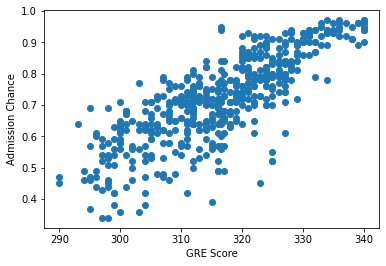

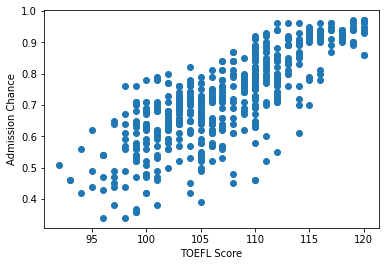

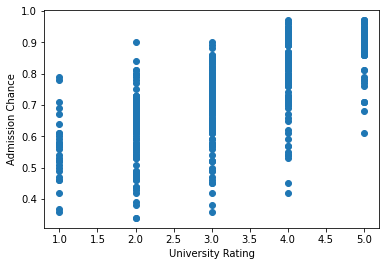

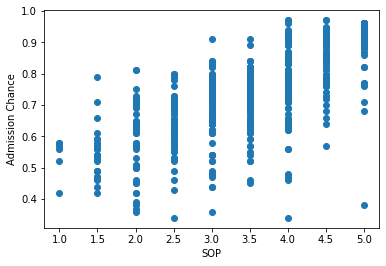

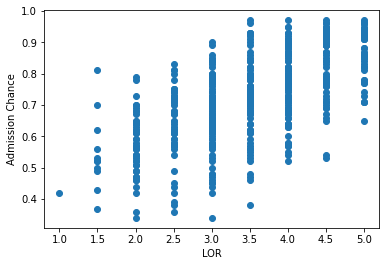

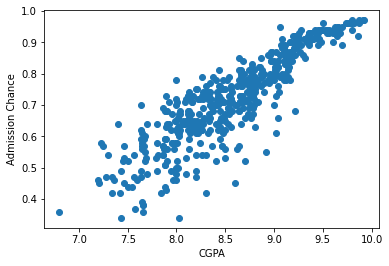

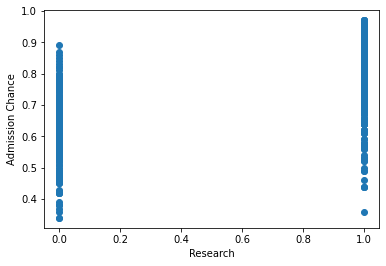

In [15]:
for col in x.columns:
    plt.scatter(x[col],Y)
    plt.xlabel(col)
    plt.ylabel('Admission Chance')
    plt.show()

In [16]:
# Use only if you want to scale the data
#from sklearn.preprocessing import StandardScaler
#scaler_feature = StandardScaler()
#scaler_label = StandardScaler()
#scaled_data = scaler_feature.fit_transform(x)
#scaled_data

In [17]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.25)

In [18]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Preidcting the result
Y_pred = reg.predict(x_test)

In [20]:
# Calculating the accuracy
from sklearn.metrics import r2_score
score = r2_score(Y_pred,Y_test)
score

0.7193250926158172

In [21]:
#saving the model to the local system
filename = "Admission_finalized_model.pickle"
pickle.dump(reg, open(filename,'wb'))

In [22]:
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict([[300,110,5,5,5,10,1]])
a

array([0.92068407])